# Quickstart

Once installation is complete you can start running Sarkas. This quickstart guide will walk you through
a simple example in order to check that everything is running smoothly.

The YAML input file can be found [here](./input_files/yocp_quickstart.yaml).


---
## Simulation

In Jupyter notebook you can run the following commands

In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import os

plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import PreProcess, Simulation, PostProcess

In [2]:
# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'yocp_quickstart.yaml')

The above commands imported the required libraries and defined the file path to our input file. 

Let's now run the simulation

In [3]:
pre = PreProcess(input_file_name)
pre.setup(read_yaml=True)
pre.run()










 ____                     __                         
/\  _`\                  /\ \                        
\ \,\L\_\     __     _ __\ \ \/'\      __      ____  
 \/_\__ \   /'__`\  /\`'__\ \ , <    /'__`\   /',__\ 
   /\ \L\ \/\ \L\.\_\ \ \/ \ \ \\`\ /\ \L\.\_/\__, `\
   \ `\____\ \__/.\_\\ \_\  \ \_\ \_\ \__/.\_\/\____/
    \/_____/\/__/\/_/ \/_/   \/_/\/_/\/__/\/_/\/___/ 
                                                     
                                                     


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                 Preprocessing                                  
********************************************************************************

Job ID: yocp_quickstart
Job directory: SarkasSimulations/yocp_quickstart
PreProcessing directory: 
SarkasSimulations/yocp_quickstart/PreProcessing

Equilibration dumps directory: 


PP acceleration timer:   0%|          | 0/11 [00:00<?, ?it/s]

Time of PP acceleration calculation averaged over 10 steps:
0 min 0 sec 7 msec 234 usec 929 nsec 



  0%|          | 0/11 [00:00<?, ?it/s]

Time of a single Equilibration step averaged over 10 steps:
0 min 0 sec 8 msec 738 usec 882 nsec 



  0%|          | 0/11 [00:00<?, ?it/s]

Time of a single Production step averaged over 10 steps:
0 min 0 sec 9 msec 786 usec 901 nsec 



----------------------- Total Estimated Times ------------------------ 


Equilibration Time: 0 hrs 1 min 27 sec

Production Time: 0 hrs 1 min 37 sec

Total Run Time: 0 hrs 3 min 5 sec


========================= Filesize Estimates =========================

Equilibration:
	H5MD filesize: 0 GB 77 MB 887 KB 259 bytes

Production:
	H5MD filesize: 0 GB 77 MB 887 KB 259 bytes

Total minimum required space: 0 GB 155 MB 750 KB 518 bytes


In [4]:
# Initialize the Simulation class
sim = Simulation(input_file_name)
# Setup the simulation's parameters
sim.setup(read_yaml=True)
# Run the simulation
sim.run()










 _______  _______  _______  _        _______  _______ 
(  ____ \(  ___  )(  ____ )| \    /\(  ___  )(  ____ \
| (    \/| (   ) || (    )||  \  / /| (   ) || (    \/
| (_____ | (___) || (____)||  (_/ / | (___) || (_____ 
(_____  )|  ___  ||     __)|   _ (  |  ___  |(_____  )
      ) || (   ) || (\ (   |  ( \ \ | (   ) |      ) |
/\____) || )   ( || ) \ \__|  /  \ \| )   ( |/\____) |
\_______)|/     \||/   \__/|_/    \/|/     \|\_______)
                                                      


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                   Simulation                                   
********************************************************************************

Job ID: yocp_quickstart
Job directory: SarkasSimulations/yocp_quickstart
Simulation directory: 
SarkasSimulations/yocp_quickstart/Simulation

Equilibration dumps directory

  0%|          | 0/10000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 1 min 14 sec


------------------------------Production------------------------------ 



  0%|          | 0/10000 [00:00<?, ?it/s]


Production Time: 0 hrs 1 min 14 sec

Total Time: 0 hrs 2 min 29 sec


========================= Filesize Estimates =========================

Equilibration:
	H5MD filesize: 0 GB 71 MB 716 KB 72 bytes

Production:
	H5MD filesize: 0 GB 71 MB 716 KB 72 bytes

Total occupied space: 0 GB 143 MB 408 KB 144 bytes


## Postprocessing

Now that our simulation is complete we need to check if the simulation was physically sound. 
The following lines which will initialize the `PostProcess` class and read the parameters of the simulation.

In [5]:
# Initialize the Postprocessing class
postproc = PostProcess(input_file_name)
# Read the simulation's parameters and assign attributes
postproc.setup(read_yaml=True)







  _________             __                   
 /   _____/____ _______|  | _______    ______
 \_____  \\__  \\_  __ \  |/ /\__  \  /  ___/
 /        \/ __ \|  | \/    <  / __ \_\___ \ 
/_______  (____  /__|  |__|_ \(____  /____  >
        \/     \/           \/     \/     \/ 


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                 Postprocessing                                 
********************************************************************************

Job ID: yocp_quickstart
Job directory: SarkasSimulations/yocp_quickstart
PostProcessing directory: 
SarkasSimulations/yocp_quickstart/PostProcessing

Equilibration dumps directory: 
SarkasSimulations/yocp_quickstart/Simulation/Equilibration/dumps
Production dumps directory: 
SarkasSimulations/yocp_quickstart/Simulation/Production/dumps

Equilibration H5MD file: 
SarkasSimulations/yocp_quick

Let's check the temperature and energy

In [6]:
from sarkas.tools.observables import RadialDistributionFunction, Thermodynamics, VelocityAutoCorrelationFunction

In [15]:
therm = Thermodynamics()
therm.setup(postproc.parameters, phase = "production")
therm.compute()

therm.dataframe.head()



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/yocp_quickstart/PostProcessing/Thermodynamics/Production/Thermodynamics_yocp_quickstart.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 1001
Total time per block: T = 5.0005e-13 [s] ~ 20 plasma periods
Time interval: dt = 5.0000e-16 [s] ~ 2.0e-02 plasma period



Thermodynamics calculation Time: 0 sec 45 msec 471 usec 208 nsec


Quantity  Total Energy     Kinetic Energy     Potential Energy      \
           Time          Mean Std           Mean Std             Mean Std   
0  0.000000e+00  2.353227e-09 NaN   1.033196e-09 NaN     1.320031e-09 NaN   
1  5.000000e-16  2.352701e-09 NaN   1.032145e-09 NaN     1.320556e-09 NaN   
2  1.000000e-15  2.352148e-09 NaN   1.031039e-09 NaN     1.321110e-09 NaN   
3  1.500000e-15  2.351573e-09 NaN   1.029890e-09 NaN     1.321684e-09 NaN   
4  2.000000e-15  2.350982e-09 NaN   1.028709e-09 NaN     1.322273e-09 NaN   

   Temperature      
          Mean Std  
0  4988.937154 NaN  
1  4983.865465 NaN  
2  4978.522500 NaN  
3  4972.973382 NaN  
4  4967.272984 NaN

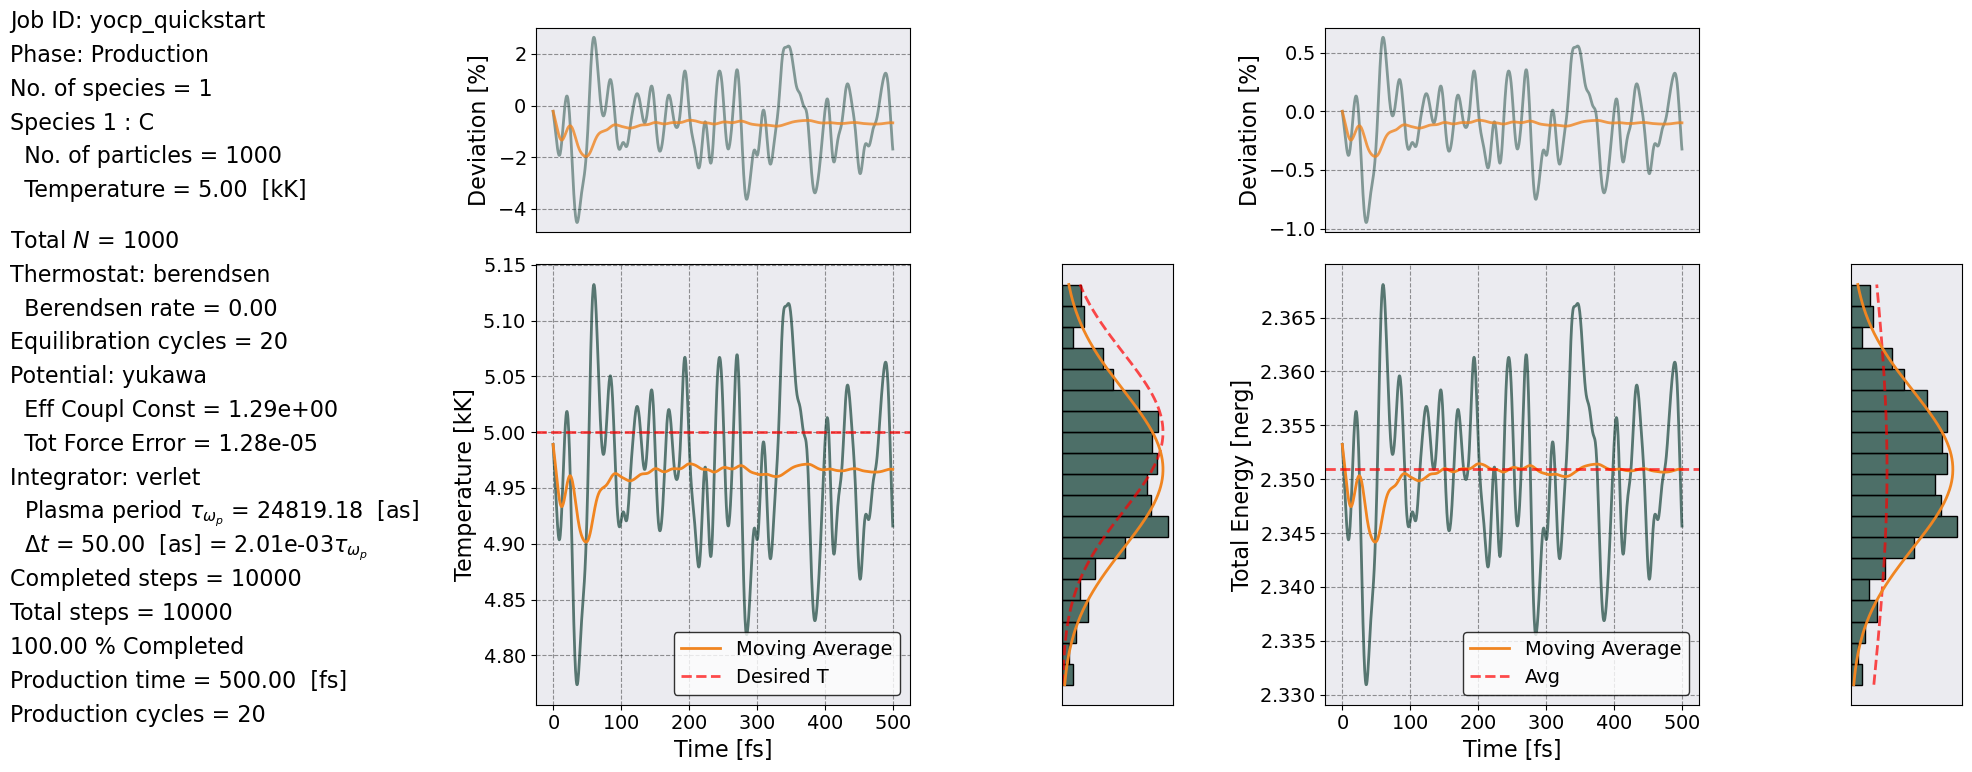

In [16]:
therm.temp_energy_plot(postproc)

Noice! The temperature (left plots) and total energy (plots on the right) are both conserved in the production phase. They do oscillate widly, but this is fine as long as the deviation percentages are within an accepted range. 

The deviation percentages (top plots) are calculated as

$$\Delta T(t) = \frac{T(t) - T_{\rm desired}}{T_{\rm desired}}, \quad \Delta E = \frac{E(t) - E(t = 0)}{E(t = 0)}. $$ 

Text(0.5, 1.0, 'Coupling')

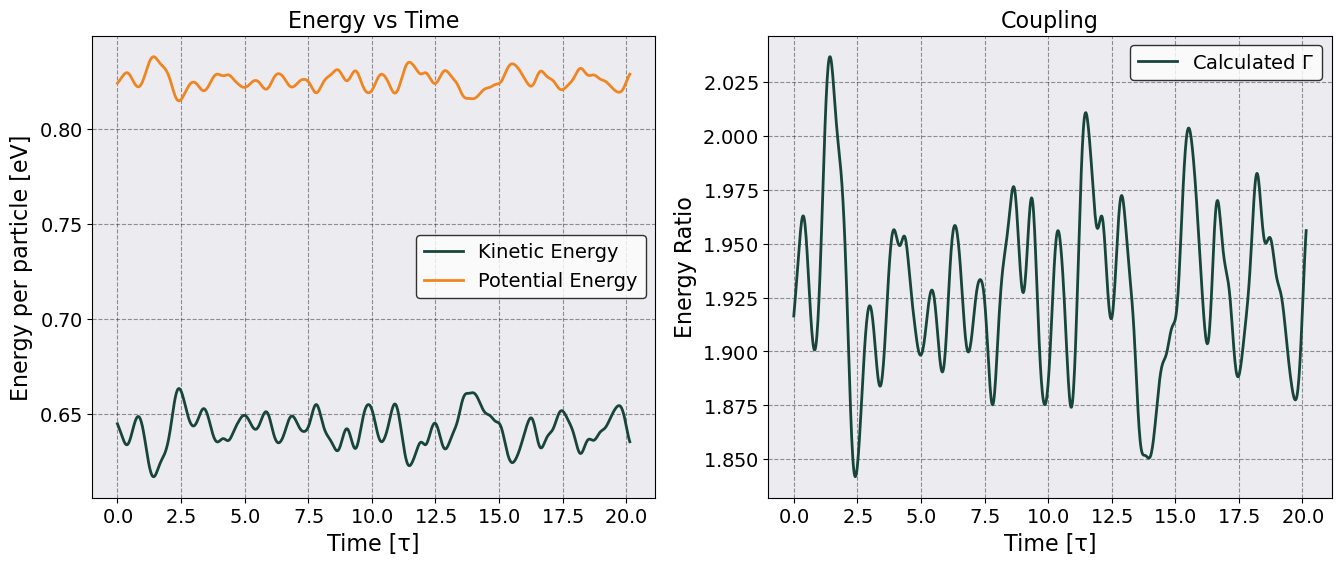

In [24]:
from astropy import units as u

time = therm.dataframe[("Quantity", "Time")] / therm.plasma_period
kinetic_energy = therm.dataframe[("Kinetic Energy", "Mean")] * u.erg.to(u.eV) / therm.total_num_ptcls
potential_energy = therm.dataframe[("Potential Energy", "Mean")] * u.erg.to(u.eV)/ therm.total_num_ptcls
total_energy = therm.dataframe[("Total Energy", "Mean")] * u.erg.to(u.eV)/ therm.total_num_ptcls
temperature = therm.dataframe[("Temperature", "Mean")]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(time, kinetic_energy, label='Kinetic Energy')
ax[0].plot(time, potential_energy, label='Potential Energy')
ax[1].plot(time, potential_energy/(temperature * u.K.to(u.eV,equivalencies=u.temperature_energy())), label=r'Calculated $\Gamma$')
# ax[1].axhline(postproc.parameters.coupling_constant, color='k', linestyle='--', label=r'Expected $\Gamma$')

ax[0].legend()
ax[0].set_xlabel('Time [τ]')
ax[0].set_ylabel('Energy per particle [eV]')
ax[0].set_title('Energy vs Time')

ax[1].legend()
ax[1].set_xlabel('Time [τ]')
ax[1].set_ylabel('Energy Ratio')
ax[1].set_title('Coupling')


___
## Observables

The most common observable is the radial distribution function, _i.e._ $g(r)$. This can be calculated using the following code.

In [9]:
rdf = RadialDistributionFunction()
rdf.setup(postproc.parameters)
rdf.compute()



==================== Radial Distribution Function ====================
Data saved in: 
 SarkasSimulations/yocp_quickstart/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_yocp_quickstart.h5
Data accessible via: self.dataframe_slices, self.dataframe
No. bins = 250
dr = 0.0187 a_ws = 2.4000e-10 [cm]
Maximum Distance (i.e. potential.rc)= 4.6852 a_ws = 6.0000e-08 [cm]
Time Series Data:
No. of blocks = 1
No. dumps per block = 1001
Total time per block: T = 5.0005e-13 [s] ~ 20 plasma periods
Time interval: dt = 5.0000e-16 [s] ~ 2.0e-02 plasma period


Calculating RDF for slice:   0%|          | 0/1 [00:00<?, ?it/s]

first dump_end 1000

Radial Distribution Function Calculation Time: 0 sec 59 msec 252 usec 416 nsec


The RDF is computed and stored in a `pandas.DataFrame`. The columns `Mean` and `Std` refer to the subdivision of the simulation data. We will explain this in another notebook. For now let's make a plot.

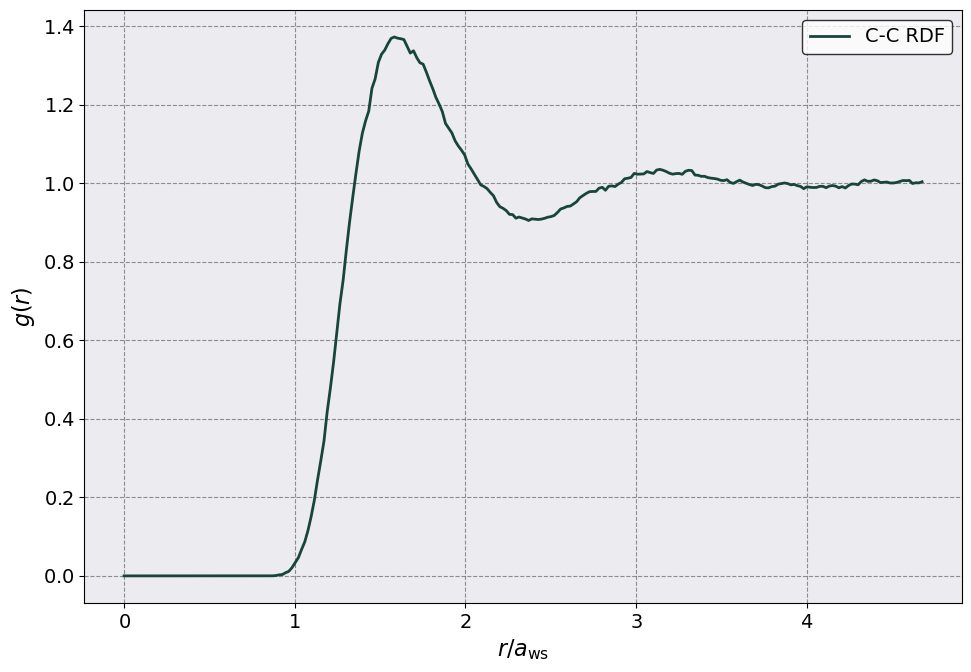

In [10]:
# Let's make a plot
ax = rdf.plot(
    scaling=rdf.a_ws,
    y = [("C-C RDF", "Mean")],
    xlabel = r'$r/a_{\rm ws}$',
    ylabel = r'$g(r)$'
)
ax.legend(["C-C RDF"])

Things to check in here are: 

* Does $g(r)$ go to 1 for large $r$ values ?
* Is there a peak at $r \sim ~1.5 a$ ?
* Is the height of this peak about ~ 1.4?

If the answer to all these question is yes than the simulation was successfull.